### Data Loading 
Loads excel file locally 

In [25]:
import pandas as pd
import os


# Path to the local Excel file
file_name = 'all_data_M_2023.xlsx'
current_directory = os.getcwd()

excel_file = os.path.join(
    current_directory, file_name
)

if os.path.exists(excel_file):
    # Read the Excel file
    df = pd.read_excel(excel_file)

    print(f"File successfully read: {excel_file}")
    print("\nDataFrame Info:")
    print(df.info())

    print("\nColumn Names:")
    print(df.columns.tolist())

    print("\nFirst Few Rows:")
    print(df.head())

    print("\nNumber of rows:", len(df))
    print("Number of columns:", len(df.columns))

    print("\nColumn Data Types:")
    print(df.dtypes)

    numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
    if len(numeric_columns) > 0:
        print("\nBasic stats for numeric columns:")
        print(df[numeric_columns].describe())

    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Check for 'OCC_GROUP' column
    if "OCC_GROUP" in df.columns:
        print("\nUnique Values in 'OCC_GROUP':")
        print(df["OCC_GROUP"].unique())
    else:
        print("\n'OCC_GROUP' column not found in the dataset")

else:
    print(f"Excel file not found at {excel_file}")

File successfully read: /Users/shawnwang/Downloads/oews-explorer-main/all_data_M_2023.xlsx

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413327 entries, 0 to 413326
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          413327 non-null  int64 
 1   AREA_TITLE    413327 non-null  object
 2   AREA_TYPE     413327 non-null  int64 
 3   PRIM_STATE    413327 non-null  object
 4   NAICS         413327 non-null  object
 5   NAICS_TITLE   413327 non-null  object
 6   I_GROUP       413327 non-null  object
 7   OWN_CODE      413327 non-null  int64 
 8   OCC_CODE      413327 non-null  object
 9   OCC_TITLE     413327 non-null  object
 10  O_GROUP       413327 non-null  object
 11  TOT_EMP       413327 non-null  object
 12  EMP_PRSE      413327 non-null  object
 13  JOBS_1000     235826 non-null  object
 14  LOC_QUOTIENT  235826 non-null  object
 15  PCT_TOTAL     170470 non-null  object
 16  PC

### Data Cleaning
Cleans the loaded file

In [26]:
import pandas as pd
import numpy as np

df = df[df["OCC_TITLE"] != "All Occupations"]

# Function to clean numeric columns
def clean_numeric(x):
    if isinstance(x, str):
        if x == "**" or x == "#":  # Add any other special characters you find
            return np.nan
        else:
            # Remove commas and percent signs if present
            return x.replace(",", "").replace("%", "")
    return x


# Apply the cleaning function to all columns
for col in df.columns:
    df[col] = df[col].apply(clean_numeric)

# Convert to numeric, coercing errors to NaN
for col in df.columns:
    if col not in [
        "AREA_TITLE",
        "PRIM_STATE",
        "NAICS",
        "NAICS_TITLE",
        "I_GROUP",
        "OCC_CODE",
        "OCC_TITLE",
        "O_GROUP",
    ]:
        df[col] = pd.to_numeric(df[col], errors="coerce")



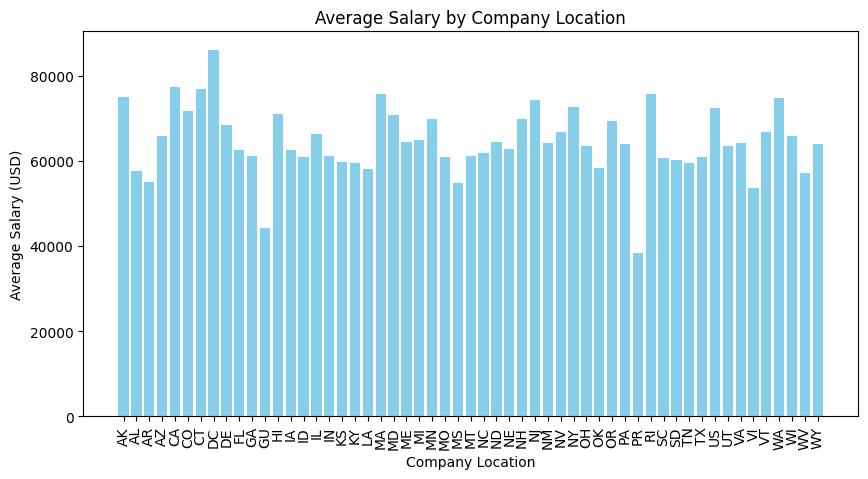

In [27]:
import matplotlib.pyplot as plt

# Group data by company location and calculate the mean salary for each location
avg_salary_by_location = df.groupby('PRIM_STATE')['A_MEAN'].mean().reset_index()

# Create a bar plot for average salary by location
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(avg_salary_by_location['PRIM_STATE'], avg_salary_by_location['A_MEAN'], color='skyblue')
ax.set_xlabel('Company Location')
ax.set_ylabel('Average Salary (USD)')
ax.set_title('Average Salary by Company Location')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

2025-03-01 14:32:39.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:32:39.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:32:39.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:32:39.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


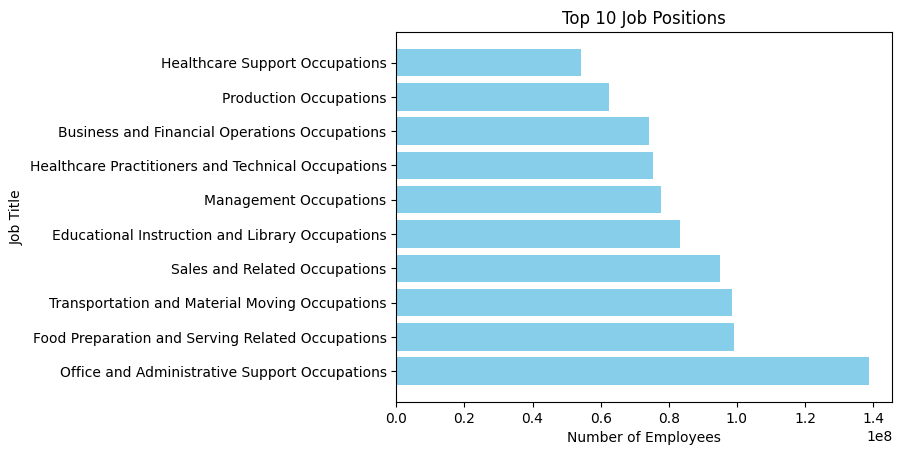

In [59]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset


# Title
st.title("Job Demand Analysis")

# --- 1. Top 10 Job Positions by Demand ---
st.subheader("Top 10 Job Positions with Highest Demand")
top_jobs = df.groupby("OCC_TITLE")["TOT_EMP"].sum().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax.barh(top_jobs["OCC_TITLE"], top_jobs["TOT_EMP"], color='skyblue')
ax.set_xlabel("Number of Employees")
ax.set_ylabel("Job Title")
ax.set_title("Top 10 Job Positions")
#st.pyplot(fig)
plt.show()

In [64]:
def compare_salaries(job1, job2):
    salary1 = df[df['OCC_TITLE'] == job1]['A_MEAN'].mean()
    salary2 = df[df['OCC_TITLE'] == job2]['A_MEAN'].mean()
    return pd.DataFrame({'Job': [job1, job2], 'Average Salary': [salary1, salary2]})

job1 = st.selectbox('Select first job', df['OCC_TITLE'].unique())
job2 = st.selectbox('Select second job', df['OCC_TITLE'].unique())
st.table(compare_salaries(job1, job2))

2025-03-01 14:36:11.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:36:11.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [70]:
from sklearn.linear_model import LinearRegression



def predict_job_growth(industry, years_ahead=5):
    industry_data = df[df['NAICS_TITLE'] == industry]
    X = industry_data['YEAR'].values.reshape(-1, 1)
    y = industry_data['TOT_EMP'].values
    model = LinearRegression().fit(X, y)
    future_years = np.array(range(X.max()+1, X.max()+1+years_ahead)).reshape(-1, 1)
    predictions = model.predict(future_years)
    return pd.DataFrame({'Year': future_years.flatten(), 'Predicted Employment': predictions})

industry = st.selectbox('Select an industry', df['NAICS_TITLE'].unique())
def analyze_industry_employment(industry):
    industry_data = df[df['NAICS_TITLE'] == industry]
    return industry_data[['OCC_TITLE', 'TOT_EMP']]

industry = st.selectbox('Select an industry', df['NAICS_TITLE'].unique())
st.table(analyze_industry_employment(industry))

2025-03-01 14:53:05.382 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.383 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-01 14:53:05.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

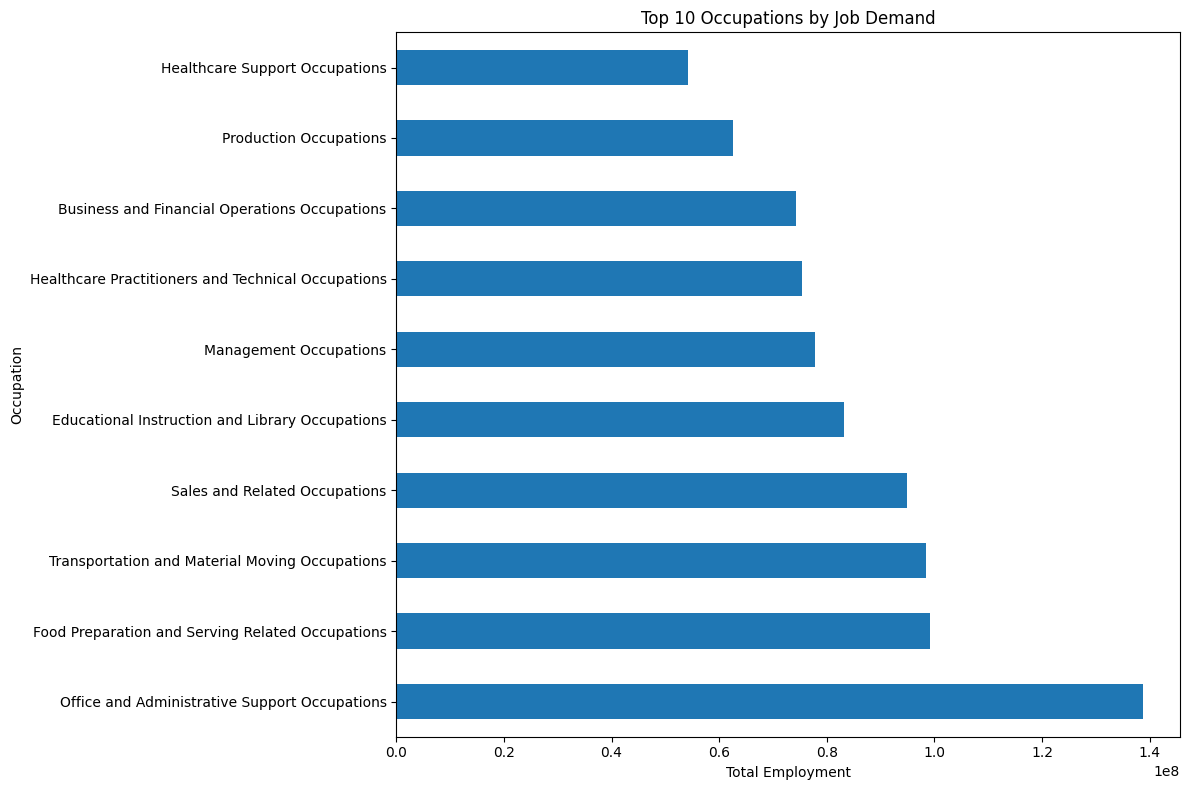

In [71]:
job_demand = df.groupby('OCC_TITLE')['TOT_EMP'].sum().sort_values(ascending=False)

# Select top 10 occupations for better visualization
top_10_jobs = job_demand.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
top_10_jobs.plot(kind='barh')

plt.title('Top 10 Occupations by Job Demand')
plt.xlabel('Total Employment')
plt.ylabel('Occupation')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()